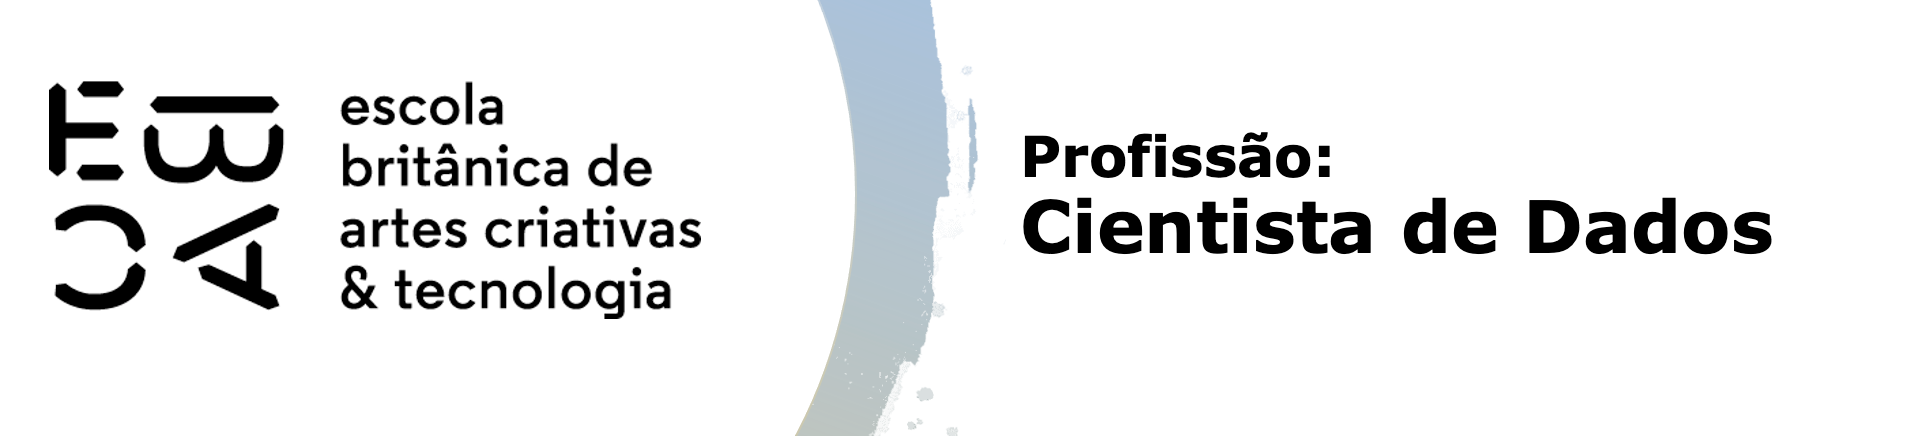

# Tarefa

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind

In [46]:
pg = sns.load_dataset('penguins')

In [47]:
pg.groupby('sex')['body_mass_g'].describe()

count         mean         std     min     25%     50%     75%     max
sex                                                                           
Female  165.0  3862.272727  666.172050  2700.0  3350.0  3650.0  4550.0  5200.0
Male    168.0  4545.684524  787.628884  3250.0  3900.0  4300.0  5312.5  6300.0

<Axes: xlabel='sex', ylabel='body_mass_g'>

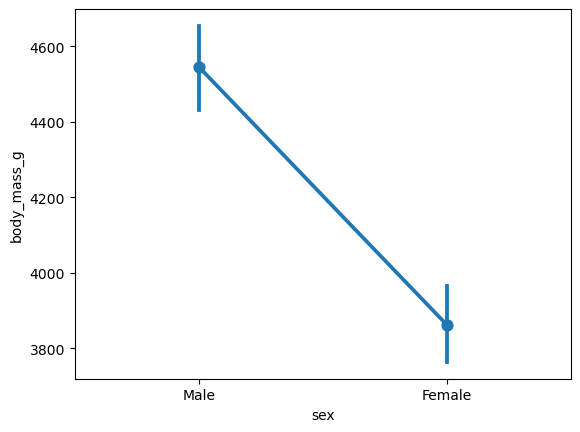

In [48]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferen√ßa de peso entre machos e f√™meas

Na base de pinguins, podemos ver que h√° diferen√ßa de peso entre machos e f√™meas. Mas ser√° que √© uma conclus√£o extrapol√°vel a toda a popula√ß√£o de pinguins? Assumindo que essa amostra √© aleat√≥ria e representativa da popula√ß√£o de pinguins, realize um teste T com 5% de signific√¢ncia para verificar se podemos induzir esta conclus√£o para a popula√ß√£o toda.

----

**Hip√≥teses:**

- ùêª0 : As m√©dias dos pesos de machos e f√™meas s√£o iguais.
- HŒ± : As m√©dias dos pesos de machos e f√™meas s√£o diferentes.


passos para realizar o teste T:

- Filtrar os dados de machos e f√™meas.
- Verificar se as vari√°veis atendem √† suposi√ß√£o de normalidade (opcional).
- Aplicar o teste T para amostras independentes.
- Analisar os resultados, em particular o p-value, com um n√≠vel de signific√¢ncia de 5%

In [52]:
femeas = pg[pg['sex'] == 'Female']['body_mass_g']
machos = pg[pg['sex'] == 'Male']['body_mass_g']

# Teste T para amostras independentes
t_stat, p_value = ttest_ind(machos, femeas, equal_var=False)

print(f"Estat√≠stica t: {t_stat}")
print(f"P-valor: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: H√° uma diferen√ßa significativa entre o peso de machos e f√™meas.")
else:
    print("N√£o rejeitamos H0: N√£o h√° diferen√ßa significativa entre o peso de machos e f√™meas.")

Estat√≠stica t: 8.554537231165762
P-valor: 4.793891255051457e-16
Rejeitamos H0: H√° uma diferen√ßa significativa entre o peso de machos e f√™meas.


## 2) (opcional) Representa√ß√£o gr√°fica do teste

Siga os passos da aula para voc√™ poder visualizar a estat√≠stica do teste, sua distribui√ß√£o e a regi√£o cr√≠tica do teste.

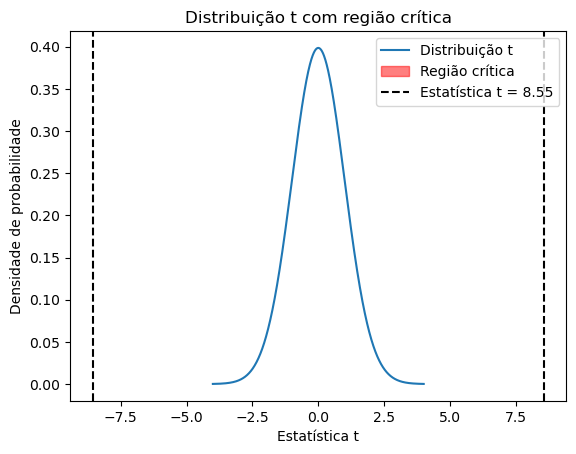

In [54]:
df = len(femeas) + len(machos) - 2  # Graus de liberdade
x = np.linspace(-4, 4, 1000)
t_dist = t.pdf(x, df)

# Plotar a distribui√ß√£o t
plt.plot(x, t_dist, label='Distribui√ß√£o t')
plt.fill_between(x, 0, t_dist, where=(x < -abs(t_stat)) | (x > abs(t_stat)), color='red', alpha=0.5, label='Regi√£o cr√≠tica')
plt.axvline(x=t_stat, color='black', linestyle='--', label=f'Estat√≠stica t = {t_stat:.2f}')
plt.axvline(x=-t_stat, color='black', linestyle='--')
plt.title('Distribui√ß√£o t com regi√£o cr√≠tica')
plt.xlabel('Estat√≠stica t')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.show()

## 3) Considere as esp√©cies

Repita o exerc√≠cio I, uma vez para cada esp√©cie de pinguim. Qual √© o *p-value* associado a cada ra√ßa?

In [56]:
print(pg['species'].unique())
species = pg['species'].unique()

for specie in species:
    femeas = pg[(pg['sex'] == 'Female') & (pg['species'] == specie)]['body_mass_g']
    machos = pg[(pg['sex'] == 'Male') & (pg['species'] == specie)]['body_mass_g']

    t_stat, p_value = ttest_ind(machos, femeas, equal_var=False)
    
    print(f"\nEsp√©cie: {specie}")
    print(f"Estat√≠stica t: {t_stat:}")
    print(f"P-valor: {p_value:}")
    
    if p_value < alpha:
        print("Rejeitamos H0: H√° uma diferen√ßa significativa entre machos e f√™meas.")
    else:
        print("N√£o rejeitamos H0: N√£o h√° diferen√ßa significativa entre machos e f√™meas.")


['Adelie' 'Chinstrap' 'Gentoo']

Esp√©cie: Adelie
Estat√≠stica t: 13.126285923485874
P-valor: 6.402319748031793e-26
Rejeitamos H0: H√° uma diferen√ßa significativa entre machos e f√™meas.

Esp√©cie: Chinstrap
Estat√≠stica t: 5.20773384899266
P-valor: 2.26443155146514e-06
Rejeitamos H0: H√° uma diferen√ßa significativa entre machos e f√™meas.

Esp√©cie: Gentoo
Estat√≠stica t: 14.761368414543291
P-valor: 1.8677596749117468e-28
Rejeitamos H0: H√° uma diferen√ßa significativa entre machos e f√™meas.
